<a href="https://colab.research.google.com/github/vchellapilla/Capstone3/blob/main/Capstone3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 3: Exploratory Data Analysis

## Imports

Import packages.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import scipy.stats as stats

Import dataset.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls -l /content/drive/MyDrive/Colab\ Notebooks/Capstone\ 3/df.csv


-rw------- 1 root root 7023793934 Sep 12 15:27 '/content/drive/MyDrive/Colab Notebooks/Capstone 3/df.csv'


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Capstone 3/df.csv'
df = pd.read_csv(path)

# Initial Look at Cleaned Dataset

Let's take a look at the cleaned dataset at hand.

In [5]:
pd.set_option('display.max_columns', None)


In [6]:
df.head()

,Unnamed: 0,movie_id,rating_val,user_id,display_name,num_ratings_pages,num_reviews,genres,image_url,imdb_id,imdb_link,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,0,feast-2014,7,deathproof,Lucy,32.0,1650.0,"[""Animation"",""Comedy"",""Drama"",""Family""]",film-poster/2/2/0/1/9/2/220192-feast-0-230-0-3...,tt3689498,http://www.imdb.com/title/tt3689498/maindetails,Feast,en,This Oscar-winning animated short film tells t...,9.260,"[""United States of America""]",2879.0,6.0,"[""English""]",293299.0,https://www.themoviedb.org/movie/293299/,7.9,720.0,2014.0
1,1,loving-2016,7,deathproof,Lucy,32.0,1650.0,"[""Romance"",""Drama""]",sm/upload/yp/k3/5v/2p/wzi191DNSs08gDQHHUxYwlxC...,tt4669986,http://www.imdb.com/title/tt4669986/maindetails,Loving,en,"The story of Richard and Mildred Loving, an in...",18.024,"[""United Kingdom"",""United States of America""]",2138.0,123.0,"[""English""]",339419.0,https://www.themoviedb.org/movie/339419/,6.7,759.0,2016.0
2,2,scripted-content,7,deathproof,Lucy,32.0,1650.0,"[""Comedy""]",film-poster/2/7/2/9/1/1/272911-scripted-conten...,tt4073494,http://www.imdb.com/title/tt4073494/maindetails,Scripted Content,en,A very short film for Vogue starring Jessica C...,1.400,"[""United States of America""]",3025.0,2.0,[],342914.0,https://www.themoviedb.org/movie/342914/,6.8,5.0,2014.0
3,3,the-future,4,deathproof,Lucy,32.0,1650.0,"[""Drama"",""Fantasy"",""Romance""]",film-poster/1/1/4/3/2/11432-the-future-0-230-0...,tt1235170,http://www.imdb.com/title/tt1235170/maindetails,The Future,en,When a couple decides to adopt a stray cat the...,5.208,"[""Germany"",""United States of America"",""France""...",4063.0,91.0,"[""English""]",54662.0,https://www.themoviedb.org/movie/54662/,6.0,60.0,2011.0
4,4,mank,5,deathproof,Lucy,32.0,1650.0,"[""Drama"",""History""]",film-poster/5/4/1/4/2/5/541425-mank-0-230-0-34...,tt10618286,http://www.imdb.com/title/tt10618286/maindetails,Mank,en,1930s Hollywood is reevaluated through the eye...,16.331,"[""United States of America""]",668.0,132.0,"[""English""]",614560.0,https://www.themoviedb.org/movie/614560/,6.9,1077.0,2020.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693032 entries, 0 to 10693031
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   movie_id              object 
 2   rating_val            int64  
 3   user_id               object 
 4   display_name          object 
 5   num_ratings_pages     float64
 6   num_reviews           float64
 7   genres                object 
 8   image_url             object 
 9   imdb_id               object 
 10  imdb_link             object 
 11  movie_title           object 
 12  original_language     object 
 13  overview              object 
 14  popularity            float64
 15  production_countries  object 
 16  release_date          float64
 17  runtime               float64
 18  spoken_languages      object 
 19  tmdb_id               float64
 20  tmdb_link             object 
 21  vote_average          float64
 22  vote_count            float64
 23  year_

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.shape

(10693032, 23)

Let's rename some of the columns for a clearer understanding of the information for our purposes.

In [10]:
df = df.rename(columns = {'rating_val':'user_rating_for_movie', 
                          'display_name': 'user_display_name', 
                          'num_ratings_pages': 'u_num_ratings_pages',
                          'num_reviews': 'u_num_reviews',
                          'overview': 'movie_overview',
                          'popularity': 'movie_popularity',
                          'release_date': 'days_since_movie_release',
                          'vote_average': 'avg_votes_for_movie',
                          'vote_count': 'vote_count_for_movie',
                          })

The dataset has 10,693,032 rows and 23 columns (after dropping one). 
<br><br>
**movie_id** is the unique Letterboxd ID assigned to a movie. <br>
**user_rating_for_movie** is the rating value given by a user to a movie on a scale of half-star increments. A half-star is 1. 5 stars is 10. <br>
**user_id** is the unqiue Letterboxd ID assigned to a user. <br>
**user_display_name** is the unique Letterboxd ID/username. It is used to form a Letterboxd URL. <br>
**u_num_ratings_pages** is the number of pages of ratings a user has. <br>
**u_num_reviews** is the total number of reviews given by a user. <br>
**genres** contains an array of associated movie genres. <br>
**image_url** is the image used on the Letterboxd site for the movie (often a poster). <br>
**imdb_id** is the ID for IMDB. <br>
**imdb_link** is the link to the movie's IMDB page. <br>
**movie_id** is the unique Letterboxd ID for the movie. <br>
**movie_title** is the display title for the movie. <br>
**original_language** is the original language of the movie. <br>
**movie_overview** is the description of the movie. <br>
**movie_popularity** is the numeric popularity of a movie (from TMDB). <br>
**production_countries** contains an array of the countries the movie was produced in. <br>
**release_date** is the number of days since the movie was released. <br>
**runtime** is the runtime of the movie in minutes.<br>
**spoken_languages** contains an array of all the spoken languages in the movie. <br>
**tmdb_id** is the ID for accessing data on TMDB API (used by the Kaggle dataset user). <br>
**avg_votes_for_movie** is the vote average (from TMDB). <br>
**vote_count_for_movie** is the count of votes the movie received (from TMDB). <br>
**year_released** is the year the movie was released.

# Explore the Data

Through the Exploratory Data Analysis, we want to determine the following things: <br>


*   The distribution of ratings & number of reviews among movies, users, years, and genres
*   The most and least popular movies and genres
*   Changes in popularity of genres and movies over time



## Correlation Matrix

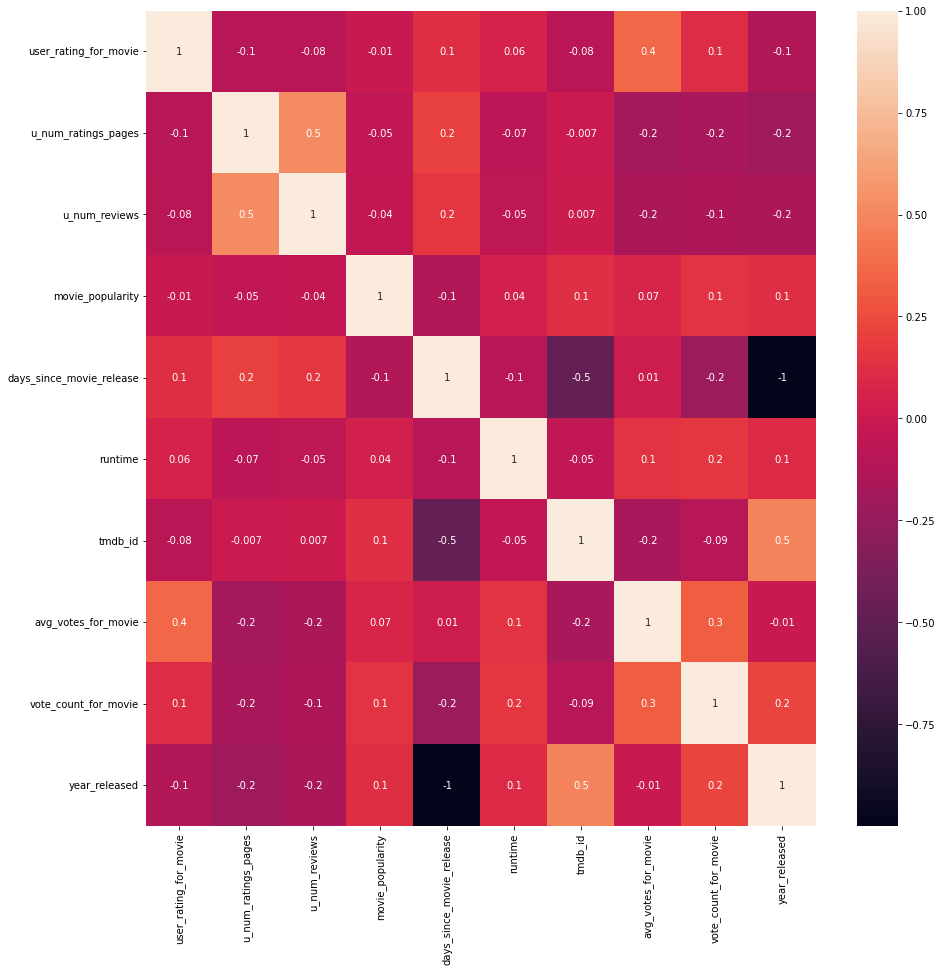

In [11]:
#correlation matrix 
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True, fmt='0.1g')

Interesting observations we can make here: <br>


*   days_since_movie_release and tmdb_id have a correlationship of -0.5. 
  *   This could simply indicate that the id is created in association to the date the movie was released. 
  *   The same could be said for the 0.5 correlationship between tmdb_id and year_released.
*   user_rating_for_movie and u_num_ratings_pages (-0.1)
*   vote_count_for_movie and year_released (0.2)
*   avg_votes_for_movie and tmdb_id (-0.2)
*   user_rating_for_movie and days_since_movie_release (0.1)
*   user_rating_for_movie and vote_average (0.4)
*   movie_popularity and vote_count_for_movie (0.1)
*   movie_popularity and year_released (0.1)
*   days_since_movie_release and num_ratings_pages (0.2)
*   days_since_movie_release and u_num_reviews (0.2)
*   movie_popularity and tmdb_id (0.1)



## Histograms of Data Distribution Across the Columns

Let's plot histograms to look at the data distribution in every column of the dataset.

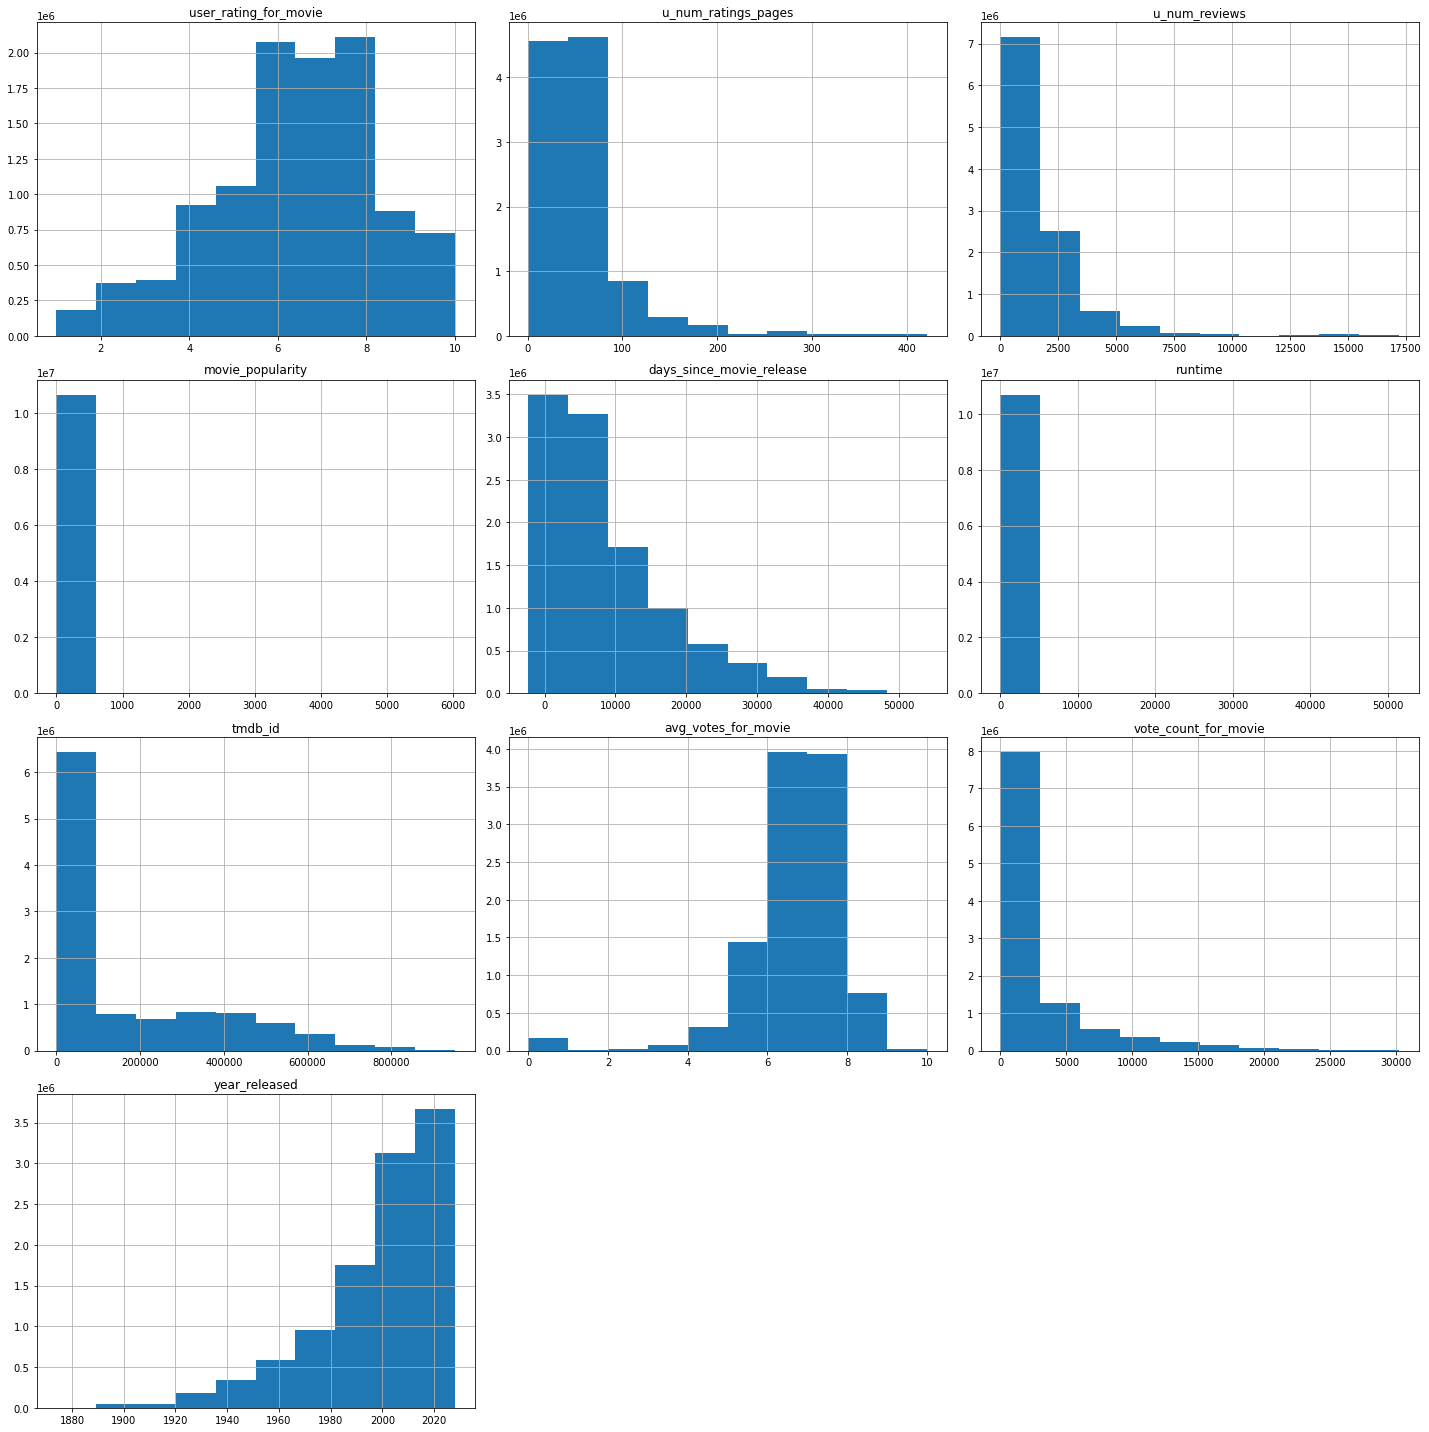

In [12]:
df.hist(figsize=(20,20), bins=10)
plt.tight_layout()

## Distribution of Ratings

### User Ratings for Movies

Let's look at the **user_rating_for_movie** column. It is the rating value given by a user to a movie on a scale of half-star increments. The highest value a movie can get is 10 and the lowest is 1.

In [13]:
df['user_rating_for_movie'].value_counts()

8     2108551
6     2077362
7     1959221
5     1059967
4      922566
9      884766
10     725248
3      395018
2      374711
1      185622
Name: user_rating_for_movie, dtype: int64

In [14]:
len(df['user_id'].unique())

7453

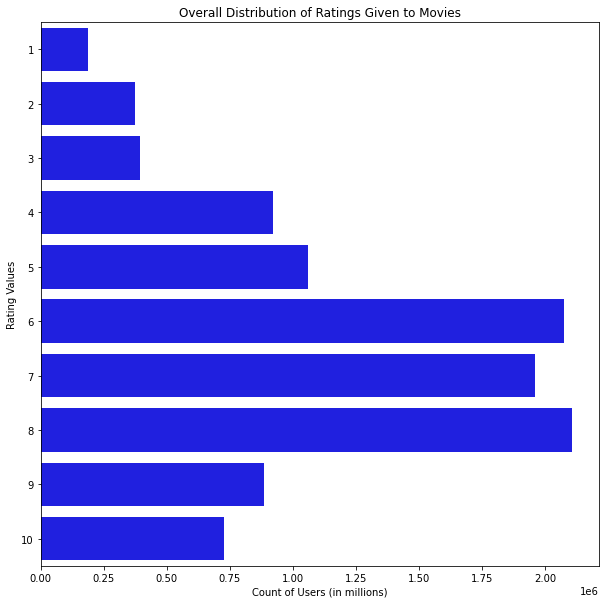

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, y=df['user_rating_for_movie'], color='blue')
plt.xlabel('Count of Users (in millions)')
plt.ylabel('Rating Values')
plt.title('Overall Distribution of Ratings Given to Movies')
plt.show()

So, the most common rating value given to a movie seems to be **8**. Exactly 2,108,551 movies were given an 8. This is immediately followed by **6** with 2,077,362 movies. 
725,248 movies have been given **10** and 185,622 movies have been given a **1**.

Let's now look at the summary statistics of this column.

In [16]:
df['user_rating_for_movie'].describe()

count    1.069303e+07
mean     6.487655e+00
std      2.082166e+00
min      1.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: user_rating_for_movie, dtype: float64

The average rating value is 6.49.

### Number of Reviews Given by Users

Now, let's look at the **u_num_reviews** column. It is the number of reviews given by each user.

In [17]:
df['u_num_reviews'].mean()

1668.788788717737

On Letterboxd, users seem to have given an average of 1,669 reviews.

In [18]:
df['u_num_reviews'].max(), df['u_num_reviews'].min()

(17184.0, 1.0)

The maximum number of reviews given by a user is 17,184. The lowest is 1. 

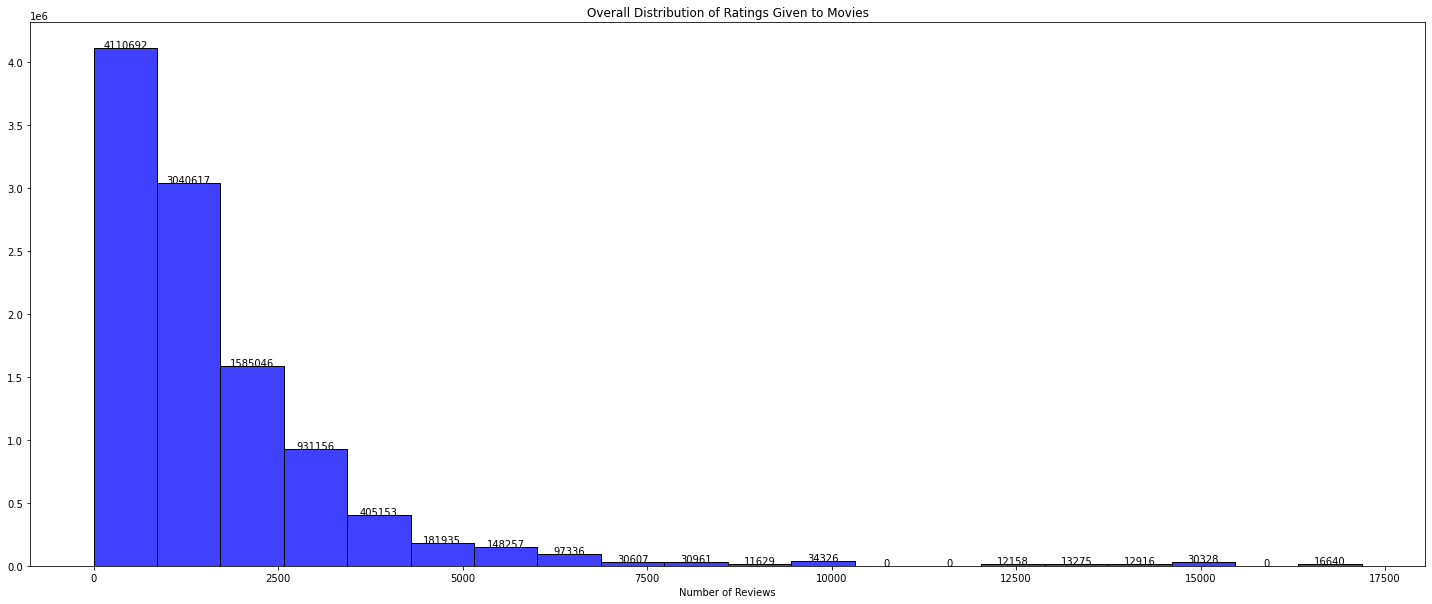

In [19]:
plt.figure(figsize=(25,10))

#plot histogram
ax = sns.histplot(data=df, x=df['u_num_reviews'], bins=20, color='blue')
plt.xlabel('Number of Reviews')
plt.ylabel('')
ax.set(title='Overall Distribution of Ratings Given to Movies')

#from: https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
# label each bar in histogram
for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

plt.show()

### Genres & Ratings

Since we don't want to OneHotEncode the **genres** column before the pre-processing stage, let's create a new data frame to explore and analyze.

In [20]:
genres_df = pd.DataFrame().assign(movie_id = df['movie_id'], genres=df['genres'], user_rating_for_movie=df['user_rating_for_movie'], u_num_reviews=df['u_num_reviews'], user_id=df['user_id'], movie_popularity=df['movie_popularity'])

In [21]:
genres_df.head()

,movie_id,genres,user_rating_for_movie,u_num_reviews,user_id,movie_popularity
0,feast-2014,"[""Animation"",""Comedy"",""Drama"",""Family""]",7,1650.0,deathproof,9.260
1,loving-2016,"[""Romance"",""Drama""]",7,1650.0,deathproof,18.024
2,scripted-content,"[""Comedy""]",7,1650.0,deathproof,1.400
3,the-future,"[""Drama"",""Fantasy"",""Romance""]",4,1650.0,deathproof,5.208
4,mank,"[""Drama"",""History""]",5,1650.0,deathproof,16.331


In [22]:
#Separating all individual genres

from ast import literal_eval

all_genres = [value for sublist in genres_df['genres'].apply(lambda row: literal_eval(row)) for value in sublist]

from collections import Counter

result = Counter(all_genres)
result

Counter({'Animation': 861488,
         'Comedy': 3244063,
         'Drama': 4709617,
         'Family': 1006963,
         'Romance': 1396996,
         'Fantasy': 1160553,
         'History': 399368,
         'Science Fiction': 1364668,
         'Horror': 1782826,
         'Thriller': 2506087,
         'Crime': 1481037,
         'Mystery': 952759,
         'Music': 394344,
         'Action': 2141516,
         'Adventure': 1682120,
         'TV Movie': 137474,
         'Documentary': 495470,
         'War': 284128,
         'Western': 182092})

*Drama* is the genre with the highest number of films at 4,709,454. *TV Movie* is the genre with the lowest number of films at 137,457.

Now, let's split the lists using the "strip" and "replace" string methods:

In [23]:
genres_df['genres'] = genres_df['genres'].str.strip("[").str.strip("]").str.replace("'", "")

Then, we will create columns for each genre.

In [24]:
genres_df['Animation'] = genres_df['genres'].map(lambda x: 1 if 'Animation' in x else 0)
genres_df['Comedy'] = genres_df['genres'].map(lambda x: 1 if 'Comedy' in x else 0)
genres_df['Drama'] = genres_df['genres'].map(lambda x: 1 if 'Drama' in x else 0)
genres_df['Family'] = genres_df['genres'].map(lambda x: 1 if 'Family' in x else 0)
genres_df['Romance'] = genres_df['genres'].map(lambda x: 1 if 'Romance' in x else 0)
genres_df['Fantasy'] = genres_df['genres'].map(lambda x: 1 if 'Fantasy' in x else 0)
genres_df['History'] = genres_df['genres'].map(lambda x: 1 if 'History' in x else 0)
genres_df['Science Fiction'] = genres_df['genres'].map(lambda x: 1 if 'Science Fiction' in x else 0)
genres_df['Horror'] = genres_df['genres'].map(lambda x: 1 if 'Horror' in x else 0)
genres_df['Thriller'] = genres_df['genres'].map(lambda x: 1 if 'Thriller' in x else 0)
genres_df['Crime'] = genres_df['genres'].map(lambda x: 1 if 'Crime' in x else 0)
genres_df['Mystery'] = genres_df['genres'].map(lambda x: 1 if 'Mystery' in x else 0)
genres_df['Music'] = genres_df['genres'].map(lambda x: 1 if 'Music' in x else 0)
genres_df['Action'] = genres_df['genres'].map(lambda x: 1 if 'Action' in x else 0)
genres_df['Adventure'] = genres_df['genres'].map(lambda x: 1 if 'Adventure' in x else 0)
genres_df['TV Movie'] = genres_df['genres'].map(lambda x: 1 if 'TV Movie' in x else 0)
genres_df['Documentary'] = genres_df['genres'].map(lambda x: 1 if 'Documentary' in x else 0)
genres_df['War'] = genres_df['genres'].map(lambda x: 1 if 'War' in x else 0)
genres_df['Western'] = genres_df['genres'].map(lambda x: 1 if 'Western' in x else 0)

In [25]:
genres_df.head()

,movie_id,genres,user_rating_for_movie,u_num_reviews,user_id,movie_popularity,Animation,Comedy,Drama,Family,Romance,Fantasy,History,Science Fiction,Horror,Thriller,Crime,Mystery,Music,Action,Adventure,TV Movie,Documentary,War,Western
0,feast-2014,"""Animation"",""Comedy"",""Drama"",""Family""",7,1650.0,deathproof,9.260,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,loving-2016,"""Romance"",""Drama""",7,1650.0,deathproof,18.024,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,scripted-content,"""Comedy""",7,1650.0,deathproof,1.400,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the-future,"""Drama"",""Fantasy"",""Romance""",4,1650.0,deathproof,5.208,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mank,"""Drama"",""History""",5,1650.0,deathproof,16.331,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


How many unique movies are in each genre?
<br> Note that movies can be listed with multiple genres and that the dataset repeats movies (contains duplicates of movie ids).

In [26]:
uniq_movies = genres_df.drop_duplicates(subset='movie_id')

In [27]:
uniq_movies.head()

,movie_id,genres,user_rating_for_movie,u_num_reviews,user_id,movie_popularity,Animation,Comedy,Drama,Family,Romance,Fantasy,History,Science Fiction,Horror,Thriller,Crime,Mystery,Music,Action,Adventure,TV Movie,Documentary,War,Western
0,feast-2014,"""Animation"",""Comedy"",""Drama"",""Family""",7,1650.0,deathproof,9.260,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,loving-2016,"""Romance"",""Drama""",7,1650.0,deathproof,18.024,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,scripted-content,"""Comedy""",7,1650.0,deathproof,1.400,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the-future,"""Drama"",""Fantasy"",""Romance""",4,1650.0,deathproof,5.208,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mank,"""Drama"",""History""",5,1650.0,deathproof,16.331,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Let's try to plot this.

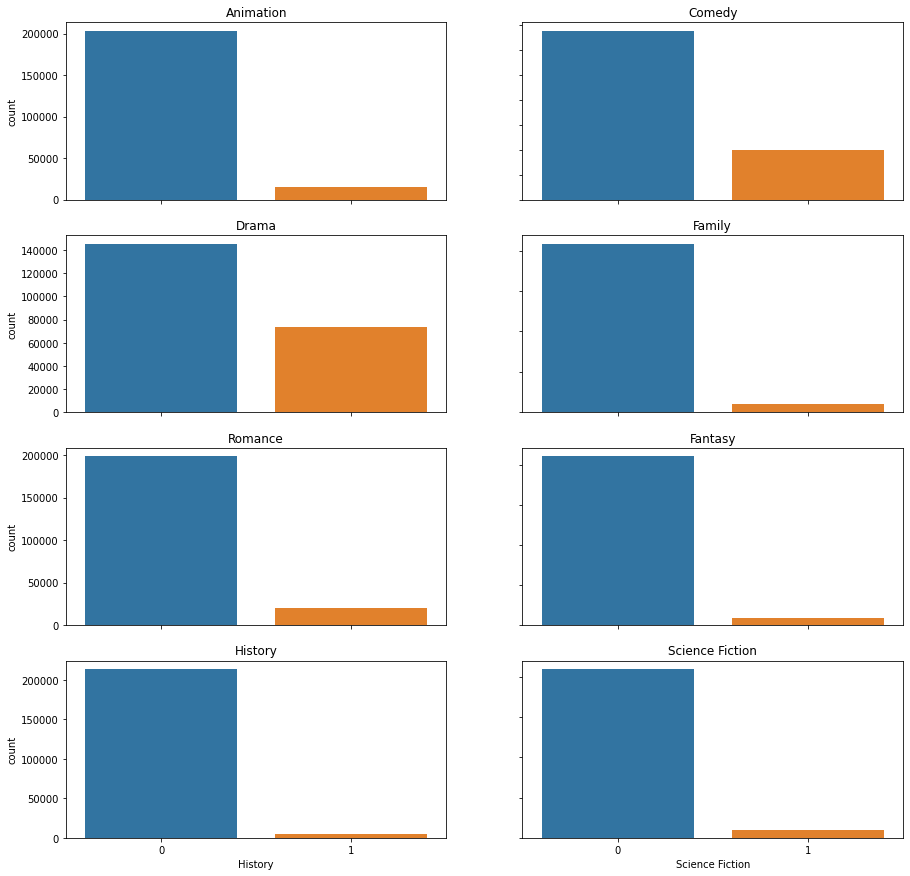

In [28]:
#how many movies in each genre
#note that movies can be listed with multiple genres

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2)

fig.set_figheight(15)
fig.set_figwidth(15)

sns.countplot(data=uniq_movies, x=uniq_movies['Animation'], ax = ax1)
ax1.set_title('Animation')
sns.countplot(data=uniq_movies, x=uniq_movies['Comedy'], ax = ax2)
ax2.set_title('Comedy')
sns.countplot(data=uniq_movies, x=uniq_movies['Drama'], ax = ax3)
ax3.set_title('Drama')
sns.countplot(data=uniq_movies, x=uniq_movies['Family'], ax = ax4)
ax4.set_title('Family')
sns.countplot(data=uniq_movies, x=uniq_movies['Romance'], ax = ax5)
ax5.set_title('Romance')
sns.countplot(data=uniq_movies, x=uniq_movies['Fantasy'], ax = ax6)
ax6.set_title('Fantasy')
sns.countplot(data=uniq_movies, x=uniq_movies['History'], ax = ax7)
ax7.set_title('History')
sns.countplot(data=uniq_movies, x=uniq_movies['Science Fiction'], ax = ax8)
ax8.set_title('Science Fiction')

for ax in fig.get_axes():
    ax.label_outer()

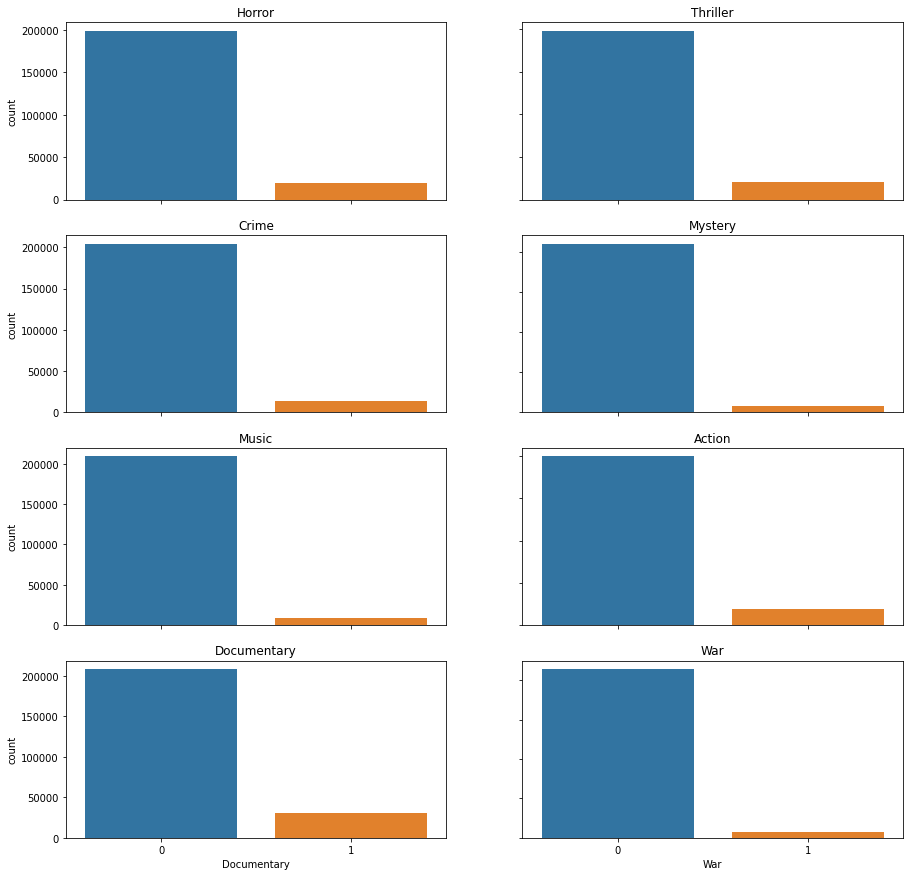

In [29]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2)

fig.set_figheight(15)
fig.set_figwidth(15)

sns.countplot(data=uniq_movies, x=uniq_movies['Horror'], ax = ax1)
ax1.set_title('Horror')
sns.countplot(data=uniq_movies, x=uniq_movies['Thriller'], ax = ax2)
ax2.set_title('Thriller')
sns.countplot(data=uniq_movies, x=uniq_movies['Crime'], ax = ax3)
ax3.set_title('Crime')
sns.countplot(data=uniq_movies, x=uniq_movies['Mystery'], ax = ax4)
ax4.set_title('Mystery')
sns.countplot(data=uniq_movies, x=uniq_movies['Music'], ax = ax5)
ax5.set_title('Music')
sns.countplot(data=uniq_movies, x=uniq_movies['Action'], ax = ax6)
ax6.set_title('Action')
sns.countplot(data=uniq_movies, x=uniq_movies['Adventure'], ax = ax7)
ax7.set_title('Adventure')
sns.countplot(data=uniq_movies, x=uniq_movies['TV Movie'], ax = ax8)
ax8.set_title('TV Movie')
sns.countplot(data=uniq_movies, x=uniq_movies['Documentary'], ax = ax7)
ax7.set_title('Documentary')
sns.countplot(data=uniq_movies, x=uniq_movies['War'], ax = ax8)
ax8.set_title('War')

for ax in fig.get_axes():
    ax.label_outer()

Text(0.5, 1.0, 'Western')

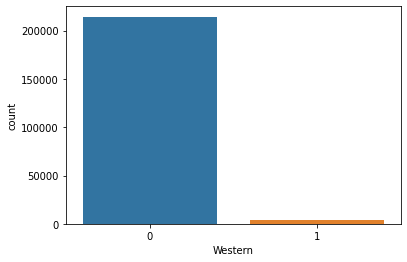

In [30]:
sns.countplot(data=uniq_movies, x=uniq_movies['Western'])
ax1.set_title('Western')

Now, what are the average ratings for each genre?

In [48]:
#average ratings per genre
genres_list = ['Animation', 'Comedy', 'Drama', 'Family', 'Romance', 'Fantasy', 'History', 'Science Fiction', 'Horror', 'Thriller', 'Crime', 'Mystery', 'Music', 'Action', 'Adventure', 'TV Movie', 'Documentary', 'War', 'Western']

for x in genres_list:
  print('Genre:', x)
  print('Average User Ratings:', uniq_movies[uniq_movies[x]==1]['user_rating_for_movie'].mean())
  print('Average Movie Popularity:', uniq_movies[uniq_movies[x]==1]['movie_popularity'].mean())
  print('------')

Genre: Animation
Average User Ratings: 5.853094462540716
Average Movie Popularity: 6.35168332247557
------
Genre: Comedy
Average User Ratings: 5.385046728971963
Average Movie Popularity: 4.563979479449301
------
Genre: Drama
Average User Ratings: 5.773498614315554
Average Movie Popularity: 3.3437347404060125
------
Genre: Family
Average User Ratings: 5.136668334167084
Average Movie Popularity: 8.890493246623311
------
Genre: Romance
Average User Ratings: 5.485849762914899
Average Movie Popularity: 4.2828593960568995
------
Genre: Fantasy
Average User Ratings: 5.624715875104678
Average Movie Popularity: 9.86697033137935
------
Genre: History
Average User Ratings: 6.00082355363393
Average Movie Popularity: 4.285545810170888
------
Genre: Science Fiction
Average User Ratings: 5.308251900108577
Average Movie Popularity: 10.190522258414767
------
Genre: Horror
Average User Ratings: 4.975012543903663
Average Movie Popularity: 4.690081033617662
------
Genre: Thriller
Average User Ratings: 5.1

Documentaries have the highest average user rating given to a movie at 6.24 while Horror movies have the lowest at 4.98. 
<br>
Documentaries also have the lowest movie popularity (numeric popularity of a movie(from TMDB)) at 1.57 while Adventure movies are the most popular at 13.7. 

### Runtime & Ratings

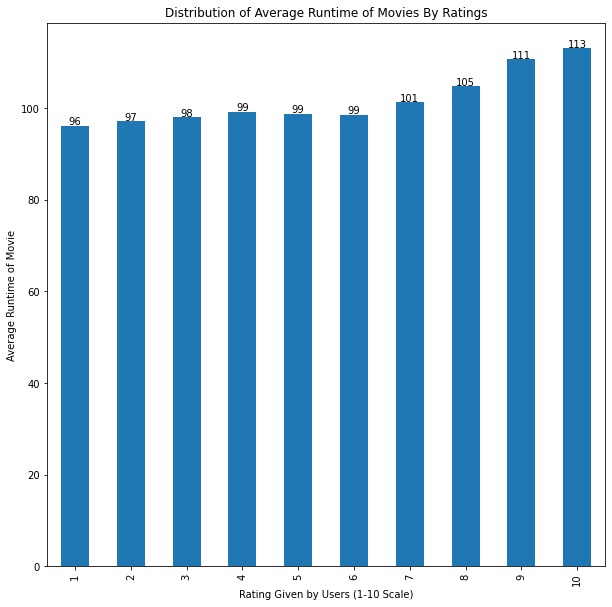

In [49]:
plt.figure(figsize=(10,10))
ax = df['runtime'].groupby(by=df['user_rating_for_movie']).mean().plot(kind='bar')
plt.ylabel('Average Runtime of Movie')
plt.xlabel('Rating Given by Users (1-10 Scale)')
plt.title('Distribution of Average Runtime of Movies By Ratings')

#from: https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
# label each bar in histogram
for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

plt.show()

## Year Movie Was Released

Does the year a movie was released have an effect on how many reviews it has or what the average rating could be?

In [50]:
df['year_released'].dtype
#convert to datetime
df['year_released'] = pd.to_datetime(df['year_released'], format='%Y')

### Average Number of Reviews Received According to Release Year of Movies

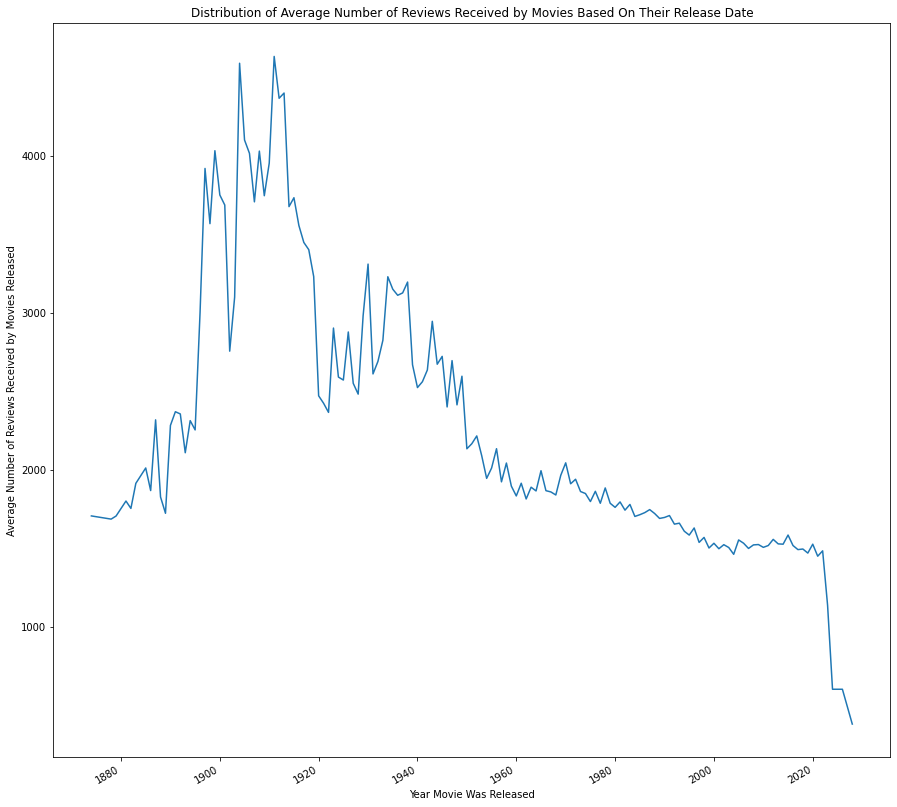

In [54]:
plt.figure(figsize=(15,15))
df['u_num_reviews'].groupby(df['year_released']).mean().plot(kind='line')
plt.ylabel('Average Number of Reviews Received by Movies Released')
plt.xlabel('Year Movie Was Released')
plt.title('Distribution of Average Number of Reviews Received by Movies Based On Their Release Date')
plt.show()

In [52]:
print(df['u_num_reviews'].groupby(df['year_released']).mean().max(), )
print(df['u_num_reviews'].groupby(df['year_released']).mean().min())

(4635.922480620155, 379.0)

In [57]:
df[df['u_num_reviews'].groupby(df['year_released']).mean().max()]

KeyError: ignored

The maximum average number of reviews received by a movie was 4,635.92 in (YEAR) while the minimum average number of reviews is 379.0 in (YEAR).
<br>
The number of reviews decreases sharply in 2020s but that may just be bacause of how recent the films are. Additionally, the pandemic provided opportunities to watch older films and film releases in 2020 were halted.

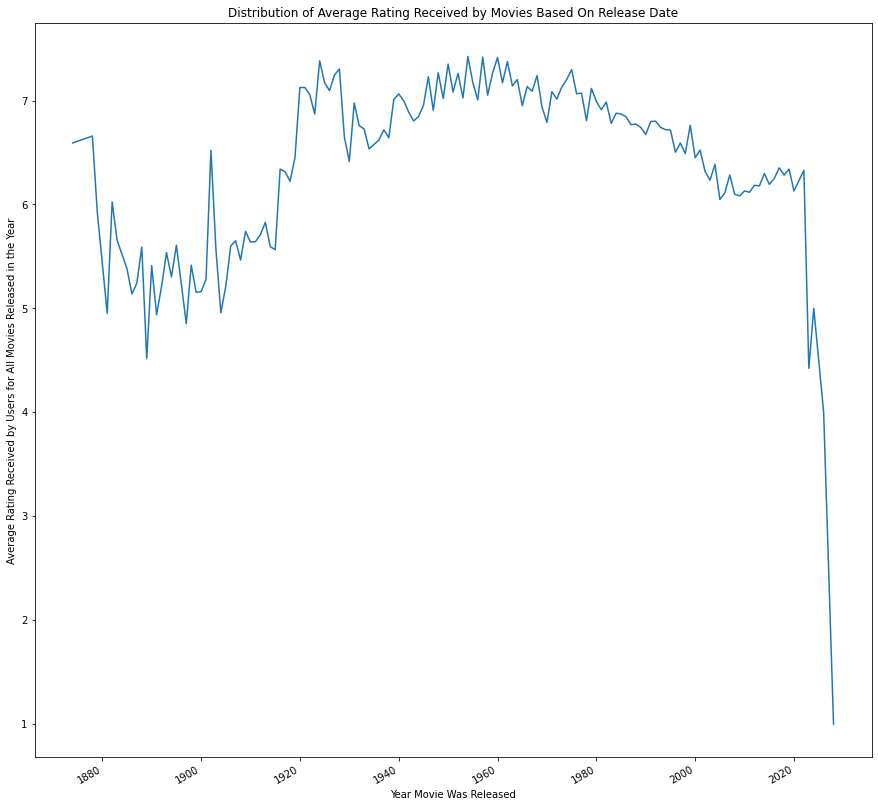

In [53]:
plt.figure(figsize=(15,15))
df['user_rating_for_movie'].groupby(df['year_released']).mean().plot(kind='line')
plt.ylabel('Average Rating Received by Users for All Movies Released in the Year')
plt.xlabel('Year Movie Was Released')
plt.title('Distribution of Average Rating Received by Movies Based On Release Date')
plt.show()

In [59]:
df['user_rating_for_movie'].groupby(df['year_released']).mean().max(), df['user_rating_for_movie'].groupby(df['year_released']).mean().min()

(7.424218913192683, 1.0)

The highest average user rating given to a movie is 7.42 in (YEAR) and the lowest is 1.0 which is for a movie from the future so, it doesn't count. 

Let's get rid of movies that have a release date after 2022.

In [61]:
df[df['year_released'] > '2022']

,movie_id,user_rating_for_movie,user_id,user_display_name,u_num_ratings_pages,u_num_reviews,genres,image_url,imdb_id,imdb_link,movie_title,original_language,movie_overview,movie_popularity,production_countries,days_since_movie_release,runtime,spoken_languages,tmdb_id,tmdb_link,avg_votes_for_movie,vote_count_for_movie,year_released
2011067,captain-marvel-2-2022,10,candelatt,candela,32.0,1228.0,"[""Action"",""Adventure"",""Science Fiction""]",film-poster/5/3/6/9/7/0/536970-the-marvels-0-2...,tt10676048,http://www.imdb.com/title/tt10676048/maindetails,The Marvels,en,The sequel to Captain Marvel (2019).,11.669,"[""United States of America""]",-157.0,0.0,"[""English""]",609681.0,https://www.themoviedb.org/movie/609681/,0.0,0.0,2023-01-01
2199393,guardians-of-the-galaxy-vol-3,3,colinmclaughlin,Colin McLaughlin,18.0,985.0,"[""Action"",""Adventure"",""Science Fiction"",""Comedy""]",film-poster/3/7/9/7/1/1/379711-guardians-of-th...,tt6791350,http://www.imdb.com/title/tt6791350/maindetails,Guardians of the Galaxy Vol. 3,en,The third film based on Marvel's Guardians of ...,26.469,"[""United States of America""]",-233.0,0.0,"[""English""]",447365.0,https://www.themoviedb.org/movie/447365/,0.0,0.0,2023-01-01
3637999,indiana-jones-5,10,timrobbins,aIina,5.0,231.0,"[""Action"",""Adventure""]",film-poster/2/6/5/4/3/3/265433-indiana-jones-0...,tt1462764,http://www.imdb.com/title/tt1462764/maindetails,Indiana Jones 5,en,Fifth and final movie in the Indiana Jones fra...,7.818,"[""United States of America""]",-290.0,0.0,"[""English""]",335977.0,https://www.themoviedb.org/movie/335977/,0.0,0.0,2023-01-01
3700522,indiana-jones-5,1,prestructural,George Krakow,35.0,431.0,"[""Action"",""Adventure""]",film-poster/2/6/5/4/3/3/265433-indiana-jones-0...,tt1462764,http://www.imdb.com/title/tt1462764/maindetails,Indiana Jones 5,en,Fifth and final movie in the Indiana Jones fra...,7.818,"[""United States of America""]",-290.0,0.0,"[""English""]",335977.0,https://www.themoviedb.org/movie/335977/,0.0,0.0,2023-01-01
7721716,the-marvels,10,candelatt,candela,32.0,1228.0,"[""Action"",""Adventure"",""Science Fiction""]",film-poster/5/3/6/9/7/0/536970-the-marvels-0-2...,tt10676048,http://www.imdb.com/title/tt10676048/maindetails,The Marvels,en,The sequel to Captain Marvel (2019).,11.669,"[""United States of America""]",-157.0,0.0,"[""English""]",609681.0,https://www.themoviedb.org/movie/609681/,0.0,0.0,2023-01-01
7868319,avatar-5,1,moviemicah,Micah,11.0,379.0,"[""Action"",""Adventure"",""Fantasy"",""Science Ficti...",film-poster/3/2/7/6/8/0/327680-avatar-5-0-230-...,tt5637536,http://www.imdb.com/title/tt5637536/maindetails,Avatar 5,en,NaN,20.617,"[""United States of America""]",-2291.0,0.0,"[""English""]",393209.0,https://www.themoviedb.org/movie/393209/,0.0,0.0,2028-01-01
7930610,ant-man-and-the-wasp-quantumania,1,brockferlaak,Brock Ferlaak,47.0,779.0,"[""Adventure"",""Science Fiction"",""Comedy""]",film-poster/5/6/6/2/3/7/566237-ant-man-and-the...,tt10954600,http://www.imdb.com/title/tt10954600/maindetails,Ant-Man and the Wasp: Quantumania,en,The third film in the Marvel Studios' Ant-Man ...,12.328,"[""United States of America""]",-318.0,0.0,"[""English""]",640146.0,https://www.themoviedb.org/movie/640146/,0.0,0.0,2023-01-01
7930748,guardians-of-the-galaxy-vol-3,4,brockferlaak,Brock Ferlaak,47.0,779.0,"[""Action"",""Adventure"",""Science Fiction"",""Comedy""]",film-poster/3/7/9/7/1/1/379711-guardians-of-th...,tt6791350,http://www.imdb.com/title/tt6791350/maindetails,Guardians of the Galaxy Vol. 3,en,The third film based on Marvel's Guardians of ...,26.469,"[""United States of America""]",-233.0,0.0,"[""English""]",447365.0,https://www.themoviedb.org/movie/447365/,0.0,0.0,2023-01-01
7930805,the-marvels,5,brockferlaak,Brock Ferlaak,47.0,779.0,"[""Action"",""Adventure"",""Science Fiction""]",film-poster/5/3/6/9/7/0/536970-the-marvels-0-2...,tt10676048,http://www.imdb.com/title/tt10676048/maindetails,The Marvels,en,The sequel to Captain Marvel (2019).,11.669,"[""United

In [62]:
df = df[df['year_released'] <= '2022']

Save the dataframe.

In [68]:
#saving dataset
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/df_eda.csv'

with open(path, 'w') as f:
  df.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
